# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.

**You must use quantitative visualizations (boxplots or histograms) when comparing quantitative features.  DO NOT categorize quantitative features.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")

In [2]:
df = pd.read_csv('loan_data.csv')
print("Shape: ",df.shape)
display(df.head())

Shape:  (45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


In [4]:
df["loan_status"] = df["loan_status"].astype(int)

# Fill missing values (minimal, safe defaults)
# Quantitative columns: fill with median
num_cols = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score",
]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
        df[c] = df[c].fillna(df[c].median())

# Categorical columns: fill with "Unknown"
cat_cols = [
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file",
]
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype(str).fillna("Unknown")

print(df.shape)
display(df.head())
print("\nLoan status counts:\n", df["loan_status"].value_counts())


(45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1



Loan status counts:
 loan_status
0    40107
1     4893
Name: count, dtype: int64


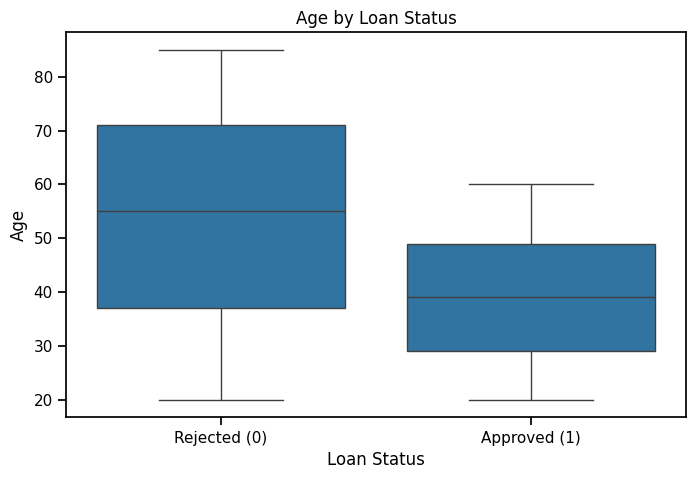

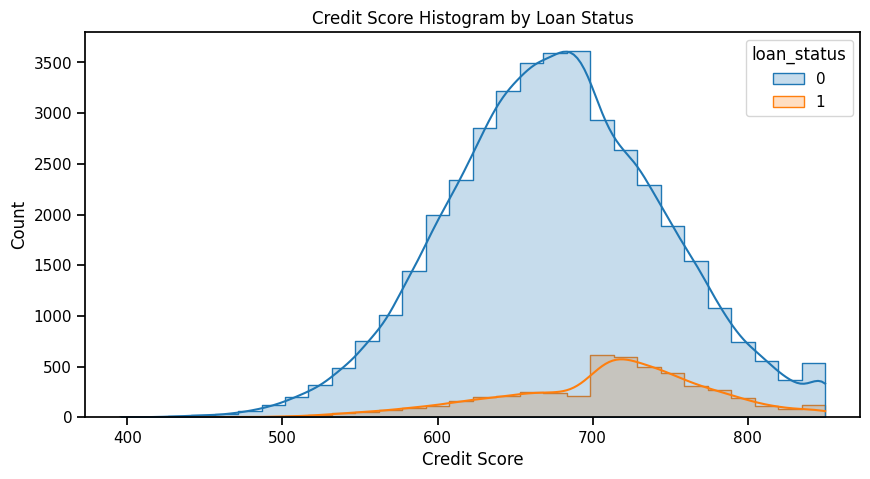

In [13]:
# -------------------------
# A) AGE (quantitative) vs loan_status
# -------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="loan_status", y="person_age", showfliers=False)
plt.title("Age by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Age")

plt.xticks([0,1], ["Rejected (0)", "Approved (1)"])
plt.show()




plt.figure(figsize=(10,5))
sns.histplot(data=df, x="credit_score", hue="loan_status", bins=30, kde=True, element="step")
plt.title("Credit Score Histogram by Loan Status")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()



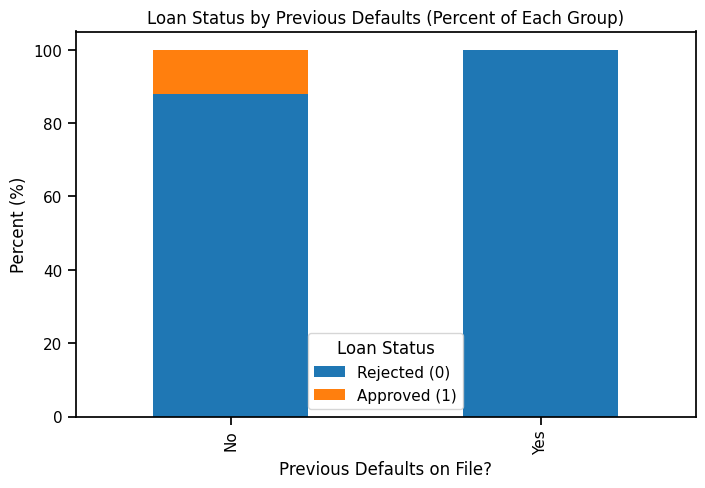

In [16]:
ct = pd.crosstab(df["previous_loan_defaults_on_file"], df["loan_status"], normalize="index") * 100

ct.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Loan Status by Previous Defaults (Percent of Each Group)")
plt.xlabel("Previous Defaults on File?")
plt.ylabel("Percent (%)")
plt.legend(["Rejected (0)", "Approved (1)"], title="Loan Status")
plt.show()



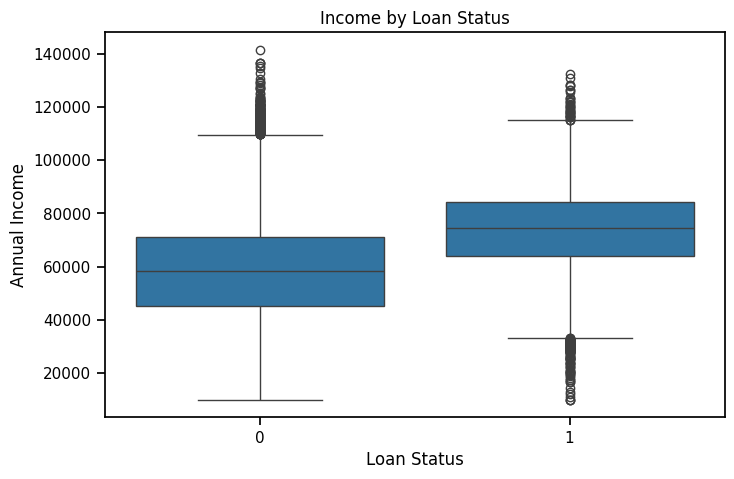

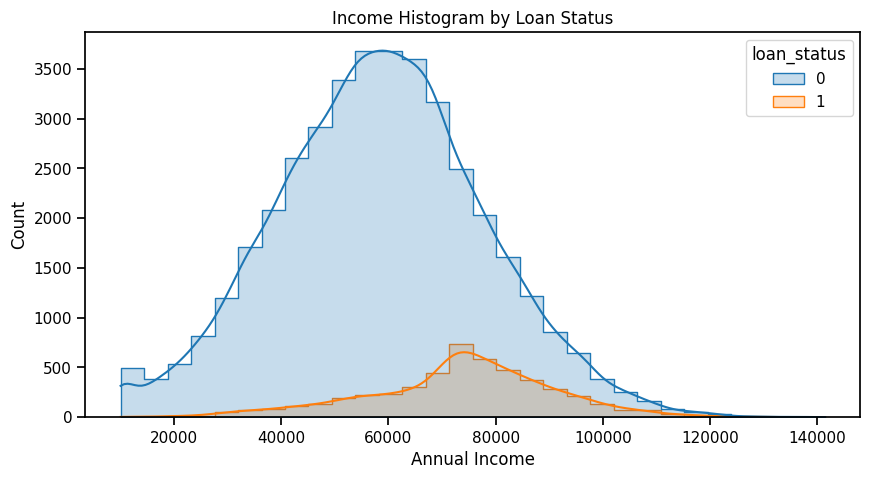

In [17]:
# 3) INCOME (quantitative)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="loan_status", y="person_income")
plt.title("Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="person_income", hue="loan_status", bins=30, kde=True, element="step")
plt.title("Income Histogram by Loan Status")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

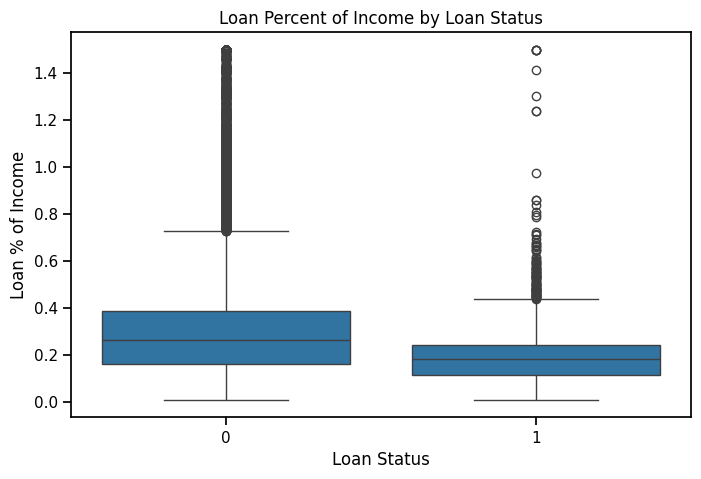

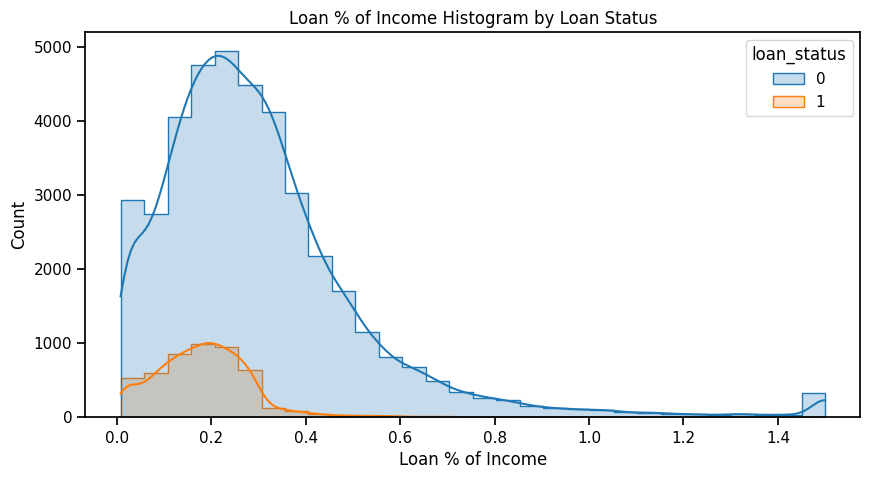

In [18]:
# 4) LOAN % INCOME (quantitative)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="loan_status", y="loan_percent_income")
plt.title("Loan Percent of Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan % of Income")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="loan_percent_income", hue="loan_status", bins=30, kde=True, element="step")
plt.title("Loan % of Income Histogram by Loan Status")
plt.xlabel("Loan % of Income")
plt.ylabel("Count")
plt.show()

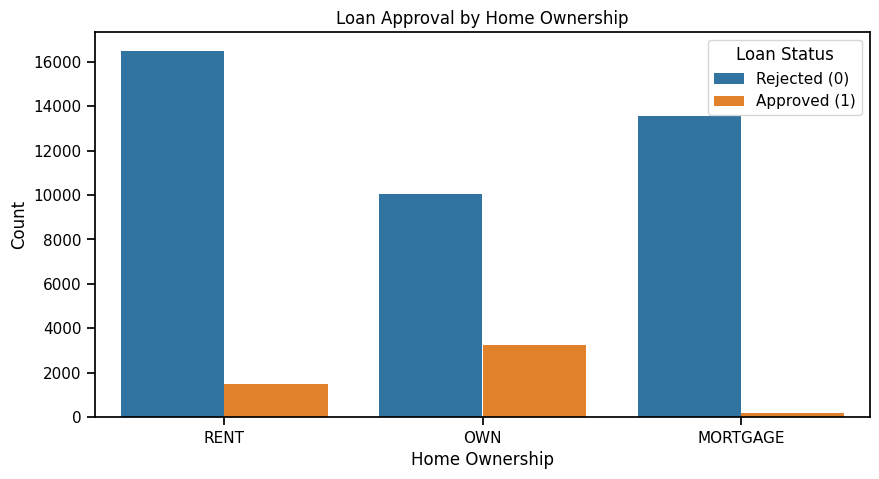


Approval rate by home ownership:
person_home_ownership
OWN         0.243471
RENT        0.082253
MORTGAGE    0.013035
Name: loan_status, dtype: float64

Median values by loan_status (0 rejected / 1 approved):


,person_age,credit_score,person_income,loan_percent_income,loan_int_rate
loan_status,,,,,
0,55.0,675.642685,58519.753892,0.263221,11.982008
1,39.0,717.207593,74654.580855,0.181438,12.018102



(Quant only) correlation with loan_status (rough indicator):


,loan_status
loan_status,1.000000
person_income,0.235032
credit_score,0.149459
cb_person_cred_hist_length,0.121588
person_emp_exp,0.007496
loan_int_rate,0.000773
loan_amnt,-0.095025
loan_percent_income,-0.169636
person_age,-0.237128


In [19]:
# 5) HOME OWNERSHIP (categorical)
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="person_home_ownership", hue="loan_status")
plt.title("Loan Approval by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.legend(title="Loan Status", labels=["Rejected (0)", "Approved (1)"])
plt.show()

print("\nApproval rate by home ownership:")
print(df.groupby("person_home_ownership")["loan_status"].mean().sort_values(ascending=False))

# -------------------------
# Extra summaries to help you write conclusions
# -------------------------
print("\nMedian values by loan_status (0 rejected / 1 approved):")
display(df.groupby("loan_status")[["person_age","credit_score","person_income","loan_percent_income","loan_int_rate"]].median())

print("\n(Quant only) correlation with loan_status (rough indicator):")
quant_cols = ["person_age","person_income","person_emp_exp","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length","credit_score"]
quant_cols = [c for c in quant_cols if c in df.columns]
display(df[quant_cols + ["loan_status"]].corr(numeric_only=True)[["loan_status"]].sort_values("loan_status", ascending=False))